In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandasql import sqldf

df = pd.read_csv(r"C:\Users\m\Taha\Codebasics Challenges\Parliament Elections\LOK SABHA.csv")

In [2]:
df.head()

,state,pc_name,candidate,sex,age,category,party,party_symbol,general_votes,postal_votes,total_votes,total_electors,Year,candidate_rank,pc_votes,pc_electors,state_votes,state_electors,party_votes,party_rank
0,Andhra Pradesh,Adilabad,Godam Nagesh,Male,49,ST,TRS,Car,425762,5085,430847,1386282,2014,1,1045839,12476538,48367188,1028145613,430847,1
1,Andhra Pradesh,Adilabad,Naresh,Male,37,ST,INC,Hand,257994,1563,259557,1386282,2014,2,1045839,12476538,48367188,1028145613,259557,2
2,Andhra Pradesh,Adilabad,Ramesh Rathod,Male,48,ST,TDP,Bicycle,182879,1319,184198,1386282,2014,3,1045839,12476538,48367188,1028145613,184198,3
3,Andhra Pradesh,Adilabad,Rathod Sadashiv,Male,55,ST,BSP,Elephant,94363,57,94420,1386282,2014,4,1045839,12476538,48367188,1028145613,94420,4
4,Andhra Pradesh,Adilabad,Nethawath Ramdas,Male,44,ST,IND,Auto- Rickshaw,41028,4,41032,1386282,2014,5,1045839,12476538,48367188,1028145613,59733,5


In [3]:
df.nunique()

state                36
pc_name             543
candidate         14547
sex                   3
age                  64
category              3
party               899
party_symbol        256
general_votes     10592
postal_votes       1602
total_votes       10635
total_electors     1053
Year                  2
candidate_rank      186
pc_votes           1046
pc_electors        1048
state_votes          69
state_electors       69
party_votes        9372
party_rank           25
dtype: int64

# Constituencies that appeared in the two years

In [4]:
query = """
select 
    pc_name,
    count(distinct Year) as Years,
    count(*) as counts
from 
    df
group by
    pc_name
having
    Years > 1
order by
    counts desc
"""
two_appearances = sqldf(query)
two_appearances

,pc_name,Years,counts
0,Nizamabad,2,203
1,Chennai South,2,84
2,Beed,2,77
3,Aurangabad,2,76
4,Belgaum,2,74
...,...,...,...
500,Ladakh,2,10
501,Daman & Diu,2,10
502,Arunachal East,2,10
503,Nagaland,2,9


# One Time Appearance

In [5]:
query = """
select 
    pc_name,
    count(distinct Year) as Years,
    count(*) as counts
from 
    df
group by
    pc_name
having
    Years = 1
order by
    counts desc
"""
one_appearance = sqldf(query)
one_appearance.head(5)

,pc_name,Years,counts
0,Raipur,1,26
1,Bilaspur,1,26
2,Durg,1,22
3,Janjgir-Champa,1,16
4,Rajnandgaon,1,15


In [6]:
one_appearance_list = one_appearance['pc_name'].unique()

## Q1. which consitituencies have elected the same party for two consecutive elections rank them by % of votes to that winning party in 2019

In [7]:
winners_parties = df[df['candidate_rank'] == 1]
winners_parties

,state,pc_name,candidate,sex,age,category,party,party_symbol,general_votes,postal_votes,total_votes,total_electors,Year,candidate_rank,pc_votes,pc_electors,state_votes,state_electors,party_votes,party_rank
0,Andhra Pradesh,Adilabad,Godam Nagesh,Male,49,ST,TRS,Car,425762,5085,430847,1386282,2014,1,1045839,12476538,48367188,1028145613,430847,1
9,Andhra Pradesh,Amalapuram,Dr Pandula Ravindra Babu,Male,58,SC,TDP,Bicycle,591480,3067,594547,1357865,2014,1,1120927,20367975,48367188,1028145613,594547,1
24,Andhra Pradesh,Anakapalli,Muttamsetti Srinivasa Rao (Avanthi),Male,47,GEN,TDP,Bicycle,566667,1796,568463,1401474,2014,1,1148072,12613266,48367188,1028145613,568463,1
33,Andhra Pradesh,Anantapur,J.C. Divakar Reddi,Male,70,GEN,TDP,Bicycle,606849,3439,610288,1536894,2014,1,1212145,21516516,48367188,1028145613,610288,1
47,Andhra Pradesh,Aruku,Kothapalli Geetha,Female,43,ST,YSRCP,Ceiling Fan,410730,2461,413191,1272340,2014,1,909614,15268080,48367188,1028145613,413191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16888,Sikkim,Sikkim,Indra Hang Subba,Male,30,GEN,SKM,Table Lamp,161143,5779,166922,434128,2019,1,351746,5209536,351746,5209536,166922,1
16900,Tripura,Tripura East,Jitendra Chaudhury,Male,57,ST,CPM,"Hammer, Sickle And Star",620251,3520,623771,1140276,2014,1,951080,14823588,2023829,32303232,623771,1
16913,Tripura,Tripura West,Sankar Prasad Datta,Male,56,GEN,CPM,"Hammer, Sickle And Star",667086,4579,671665,1248546,2014,1,1072749,17479644,2023829,32303232,671665,1
16927,Tripura,Tripura East,Rebati Tripura,Male,43,ST,BJP,Lotus,479634,2492,482126,1261861,2019,1,1045417,13880471,2153172,32820469,482126,1


In [8]:
query = """
select 
    pc_name,
    party,
    count(*) as counts
from 
    winners_parties
group by
    pc_name, party
having
    counts > 1
order by
    counts desc
"""
same_parties = sqldf(query)
same_parties

,pc_name,party,counts
0,Agra,BJP,2
1,Ahmadnagar,BJP,2
2,Ahmedabad East,BJP,2
3,Ahmedabad West,BJP,2
4,Ajmer,BJP,2
...,...,...,...
327,Wardha,BJP,2
328,Wayanad,INC,2
329,West Delhi,BJP,2
330,Yavatmal-Washim,SHS,2


In [9]:
same_parties_list = same_parties['pc_name']

In [10]:
df_same_party = winners_parties[winners_parties['pc_name'].isin(same_parties_list)]

In [11]:
query = """
select 
    pc_name,
    Year,
    pc_votes,
    party,
    party_votes,
    round((party_votes/cast(pc_votes as real)) * 100, 2) as party_votes_perc
from
    df_same_party
order by
    Year desc, party_votes_perc desc
"""
Q1_rank = sqldf(query)
Q1_rank

,pc_name,Year,pc_votes,party,party_votes,party_votes_perc
0,Surat,2019,1068412,BJP,795651,74.47
1,Navsari,2019,1308018,BJP,972739,74.37
2,Vadodara,2019,1222348,BJP,883719,72.30
3,Kangra,2019,1006989,BJP,725218,72.02
4,Bhilwara,2019,1310513,BJP,938160,71.59
...,...,...,...,...,...,...
659,Domariyaganj,2014,935027,BJP,298845,31.96
660,Samastipur (Sc),2014,863199,LJP,270401,31.33
661,Mahabubabad,2014,1124372,TRS,320569,28.51
662,Ludhiana,2014,1100457,INC,300459,27.30


In [12]:
Q1_rank[['pc_name', 'party']].nunique()

pc_name    332
party       23
dtype: int64

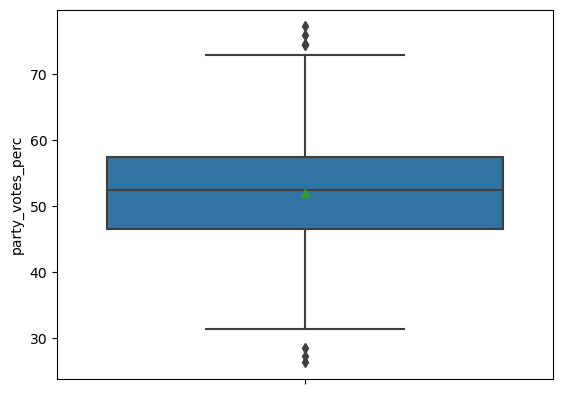

In [13]:
sns.boxplot( y = Q1_rank['party_votes_perc'], showmeans = True)
plt.show()

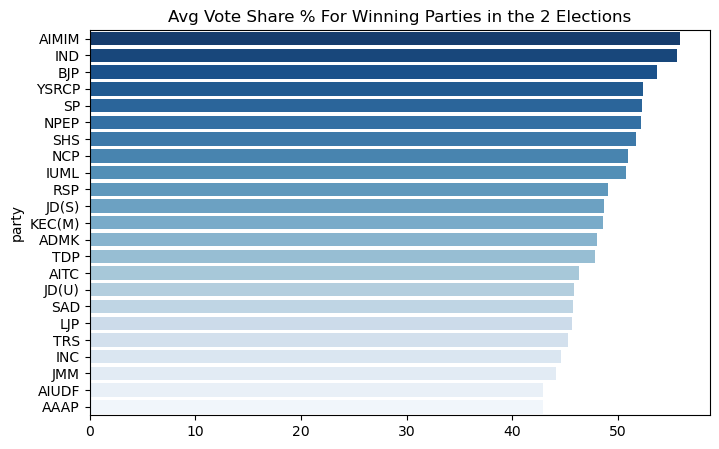

In [14]:
Q1_barchart = Q1_rank.groupby('party')['party_votes_perc'].mean().sort_values(ascending = False)

plt.figure(figsize = (8,5))
sns.barplot( y = Q1_barchart.index, x = Q1_barchart.values, palette = "Blues_r")
plt.title('Avg Vote Share % For Winning Parties in the 2 Elections')
plt.show()

## Q2. which constituencies have voted for different parties in two elections(list top 10 based on difference 19 - 14 in winner vote perc.

In [15]:
top_2_df = df[df['candidate_rank'].isin([1,2])]

In [16]:
df_diff_parties = top_2_df[~(top_2_df['pc_name'].isin(same_parties_list)) & ~(top_2_df['pc_name'].isin(one_appearance_list))]
df_diff_parties

,state,pc_name,candidate,sex,age,category,party,party_symbol,general_votes,postal_votes,total_votes,total_electors,Year,candidate_rank,pc_votes,pc_electors,state_votes,state_electors,party_votes,party_rank
0,Andhra Pradesh,Adilabad,Godam Nagesh,Male,49,ST,TRS,Car,425762,5085,430847,1386282,2014,1,1045839,12476538,48367188,1028145613,430847,1
1,Andhra Pradesh,Adilabad,Naresh,Male,37,ST,INC,Hand,257994,1563,259557,1386282,2014,2,1045839,12476538,48367188,1028145613,259557,2
9,Andhra Pradesh,Amalapuram,Dr Pandula Ravindra Babu,Male,58,SC,TDP,Bicycle,591480,3067,594547,1357865,2014,1,1120927,20367975,48367188,1028145613,594547,1
10,Andhra Pradesh,Amalapuram,Pinipe Viswarupu,Male,51,SC,YSRCP,Ceiling Fan,470804,3167,473971,1357865,2014,2,1120927,20367975,48367188,1028145613,473971,2
24,Andhra Pradesh,Anakapalli,Muttamsetti Srinivasa Rao (Avanthi),Male,47,GEN,TDP,Bicycle,566667,1796,568463,1401474,2014,1,1148072,12613266,48367188,1028145613,568463,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16914,Tripura,Tripura West,Arunoday Saha,Male,65,GEN,INC,Hand,167226,953,168179,1248546,2014,2,1072749,17479644,2023829,32303232,168179,2
16927,Tripura,Tripura East,Rebati Tripura,Male,43,ST,BJP,Lotus,479634,2492,482126,1261861,2019,1,1045417,13880471,2153172,32820469,482126,1
16928,Tripura,Tripura East,Maharaj Kumari Pragya Debburman,Female,50,ST,INC,Hand,276517,1319,277836,1261861,2019,2,1045417,13880471,2153172,32820469,277836,2
16938,Tripura,Tripura West,Pratima Bhoumik,Female,50,GEN,BJP,Lotus,570021,3511,573532,1352857,2019,1,1107755,18939998,2153172,32820469,573532,1


In [17]:
query = """
select 
    *
from
(select 
    pc_name,
    pc_votes,
    party,
    Year,
    party_rank,
    total_votes,
    vote_share_perc,
    sum(case when party_rank = 1 then vote_share_perc end) over(partition by pc_name, Year) - sum(case when party_rank = 2 then vote_share_perc end) over(partition by pc_name, Year) as share_diff
from
(
select
    *,
    round((total_votes/cast(pc_votes as real)) * 100, 2) as vote_share_perc
from
    df_diff_parties
                                                      ) as sub
                                                      ) as sub1
where party_rank = 1
order by share_diff desc 
limit 10
"""
diff_parties = sqldf(query)
diff_parties

,pc_name,pc_votes,party,Year,party_rank,total_votes,vote_share_perc,share_diff
0,Tripura East,951080,CPM,2014,1,623771,65.59,50.93
1,Chennai North,955545,DMK,2019,1,590986,61.85,48.30
2,Tripura West,1072749,CPM,2014,1,671665,62.61,46.93
3,Dindigul,1160046,DMK,2019,1,746523,64.35,46.46
4,Tiruchirappalli,1048062,INC,2019,1,621285,59.28,43.82
5,Autonomous District,617735,BJP,2019,1,381316,61.73,38.79
6,Nagaland,1038910,NPF,2014,1,713372,68.67,38.53
7,Chennai Central,785450,DMK,2019,1,448911,57.15,38.38
8,Karur,1103165,INC,2019,1,695697,63.06,38.12
9,Srinagar,186832,JKN,2019,1,106750,57.14,37.50


In [18]:
diff_parties[['pc_name', 'party']].nunique()

pc_name    10
party       6
dtype: int64

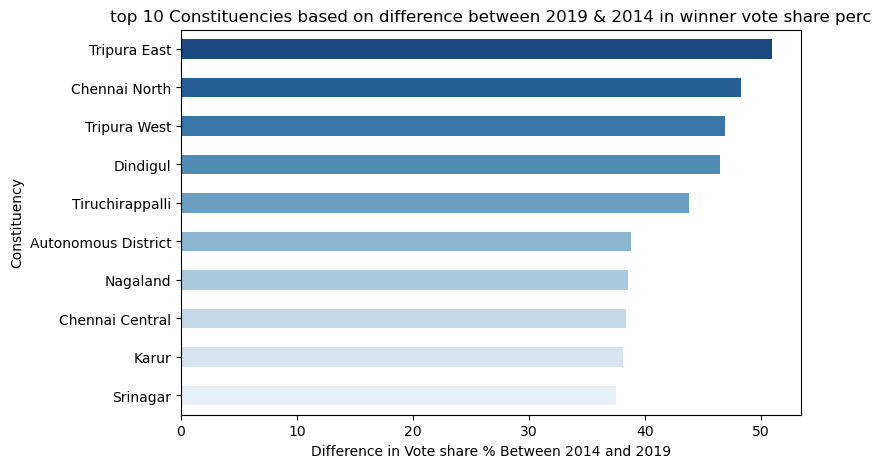

In [19]:
plt.figure(figsize = (8,5))
sns.barplot(data = diff_parties, y = 'pc_name', x = 'share_diff', palette = 'Blues_r', width = .5)
plt.xlabel('Difference in Vote share % Between 2014 and 2019')
plt.ylabel('Constituency')
plt.title("top 10 Constituencies based on difference between 2019 & 2014 in winner vote share perc")
plt.show()

## Q3. list top 5 constituencies for two major national parties where they have gained/lost vote share in 19 as compared to 14

In [20]:
winners_parties.groupby('Year')['pc_name'].count()

Year
2014    508
2019    540
Name: pc_name, dtype: int64

In [21]:
query = """
select 
    party,
    Year,
    count(*) as seats
from
    winners_parties
group by
    party, Year
order by
    seats desc
"""
sqldf(query).head(4)

,party,Year,seats
0,BJP,2019,301
1,BJP,2014,268
2,INC,2019,52
3,INC,2014,43


In [22]:
query = """
select
    *,
    votes_2019 - votes_2014 as votes_diff
from
(
select
    party,
    pc_name,
    count(distinct Year) as years,
    sum(case when Year = 2019 then party_votes else 0 end) as votes_2019,
    sum(case when Year = 2014 then party_votes else 0 end) as votes_2014 
from
    df
where 
    party in ('BJP', 'INC')
group by
    party, pc_name 
                                ) as sub
where 
    years <> 1
order by 
    party, votes_diff desc
"""
Q3 = sqldf(query)
Q3

,party,pc_name,years,votes_2019,votes_2014,votes_diff
0,BJP,Maharajganj,2,2545402,1584590,960812
1,BJP,Hamirpur,2,2515628,1803838,711790
2,BJP,Purulia,2,668107,86236,581871
3,BJP,Ranaghat,2,783253,233670,549583
4,BJP,Jalpaiguri,2,760145,221593,538552
...,...,...,...,...,...,...
725,INC,Saharanpur,2,207068,407909,-200841
726,INC,Nizamabad,2,69240,272123,-202883
727,INC,Raiganj,2,83662,315881,-232219
728,INC,Ratnagiri - Sindhudurg,2,63299,343037,-279738


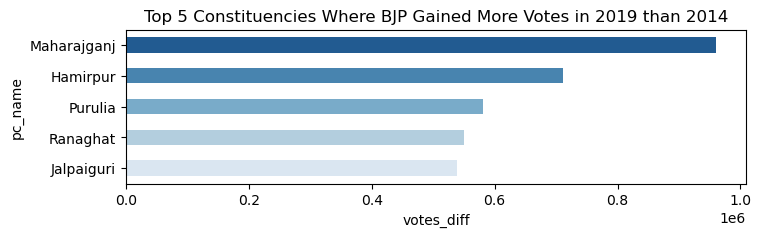

In [23]:
plt.figure(figsize = (8,2))
sns.barplot(data = Q3[Q3['party'] == 'BJP'].head(5),
           x = 'votes_diff', y = 'pc_name', palette = 'Blues_r', width = .5)
plt.title('Top 5 Constituencies Where BJP Gained More Votes in 2019 than 2014')
plt.show()

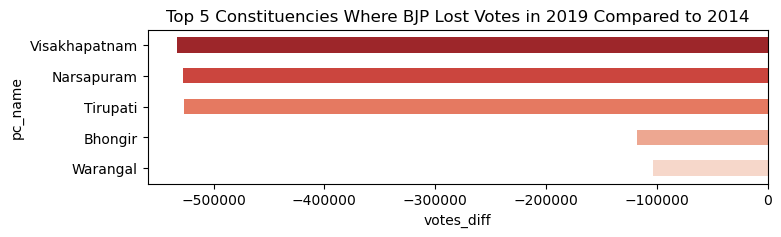

In [24]:
plt.figure(figsize = (8,2))
sns.barplot(data = Q3[Q3['party'] == 'BJP'].tail(5).sort_values(by = 'votes_diff'),
           x = 'votes_diff', y = 'pc_name', palette = 'Reds_r', width = .5)
plt.title('Top 5 Constituencies Where BJP Lost Votes in 2019 Compared to 2014')
plt.show()

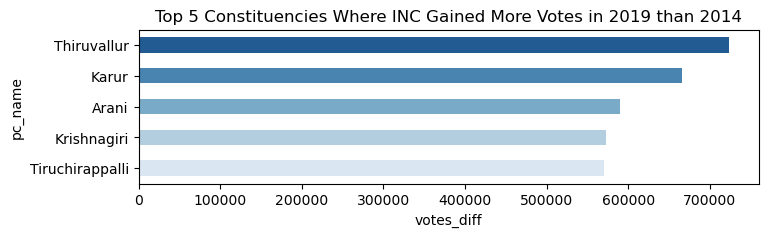

In [25]:
plt.figure(figsize = (8,2))
sns.barplot(data = Q3[Q3['party'] == 'INC'].head(5),
           x = 'votes_diff', y = 'pc_name', palette = 'Blues_r', width = .5)
plt.title('Top 5 Constituencies Where INC Gained More Votes in 2019 than 2014')
plt.show()

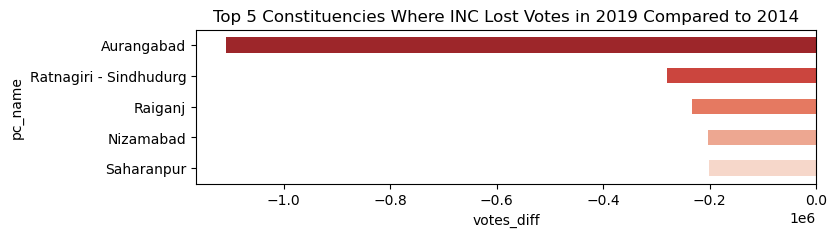

In [26]:
plt.figure(figsize = (8,2))
sns.barplot(data = Q3[Q3['party'] == 'INC'].tail(5).sort_values(by = 'votes_diff'),
           x = 'votes_diff', y = 'pc_name', palette = 'Reds_r', width = .5)
plt.title('Top 5 Constituencies Where INC Lost Votes in 2019 Compared to 2014')
plt.show()

## Q4. which constituency have elected candidates whose party has less than 10% vote share at state level in 2019

In [27]:
query = """
select
    state,
    party,
    Year,
    count(*) as seats
from
    winners_parties
where 
    Year = 2019
group by
    state, party, Year
order by
    seats desc
"""
sqldf(query)

,state,party,Year,seats
0,Uttar Pradesh,BJP,2019,61
1,Madhya Pradesh,BJP,2019,28
2,Gujarat,BJP,2019,26
3,Karnataka,BJP,2019,25
4,Rajasthan,BJP,2019,24
...,...,...,...,...
79,Tamil Nadu,ADMK,2019,1
80,Tamil Nadu,IUML,2019,1
81,Tamil Nadu,VCK,2019,1
82,Telangana,AIMIM,2019,1


In [28]:
query = """
select 
    *
from
(select 
    state,
    state_votes,
    pc_name, 
    party,
    round((sum(party_votes) / cast(state_votes as real)) * 100,2) as votes_perc
from
    winners_parties
where
    Year = 2019
group by
    state, state_votes, party
                                            ) as sub
where 
    votes_perc < 10
order by
    votes_perc desc
"""
Q4 = sqldf(query)
Q4.head()

,state,state_votes,pc_name,party,votes_perc
0,Telangana,18642895,Adilabad,BJP,9.34
1,Telangana,18642895,Bhongir,INC,8.92
2,Punjab,13765432,Bathinda,SAD,8.18
3,Jammu & Kashmir,3552622,Anantnag,JKN,7.89
4,Bihar,40806661,Hajipur (Sc),LJP,7.86


In [29]:
len(Q4)

39

In [30]:
Q4.nunique()

state          17
state_votes    17
pc_name        39
party          25
votes_perc     38
dtype: int64

In [31]:
Q4['pc & party'] = Q4['pc_name'] + ' - ' + Q4['party']

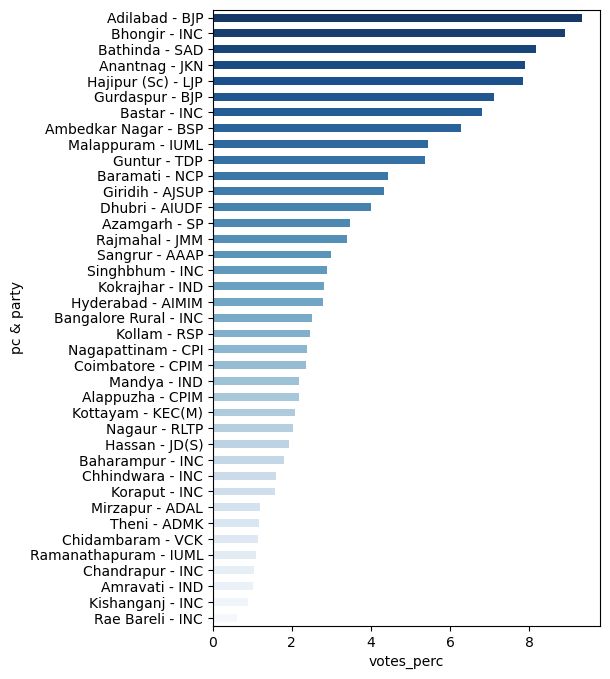

In [32]:
plt.figure(figsize = (5,8))
sns.barplot(data = Q4, y = 'pc & party', x = 'votes_perc', width = .5, palette = 'Blues_r')
plt.show()

In [33]:
Q4[Q4['party'].isin(['BJP', 'INC'])].sort_values(by = 'party')

,state,state_votes,pc_name,party,votes_perc,pc & party
0,Telangana,18642895,Adilabad,BJP,9.34,Adilabad - BJP
5,Punjab,13765432,Gurdaspur,BJP,7.12,Gurdaspur - BJP
1,Telangana,18642895,Bhongir,INC,8.92,Bhongir - INC
6,Chhattisgarh,13614453,Bastar,INC,6.80,Bastar - INC
16,Jharkhand,14961958,Singhbhum,INC,2.89,Singhbhum - INC
19,Karnataka,35138682,Bangalore Rural,INC,2.50,Bangalore Rural - INC
28,West Bengal,57206976,Baharampur,INC,1.81,Baharampur - INC
29,Madhya Pradesh,36910610,Chhindwara,INC,1.59,Chhindwara - INC
30,Odisha,23794122,Koraput,INC,1.56,Koraput - INC
35,Maharashtra,54054245,Chandrapur,INC,1.04,Chandrapur - INC


In [34]:
Q4[Q4['votes_perc'] == Q4['votes_perc'].min()]

,state,state_votes,pc_name,party,votes_perc,pc & party
38,Uttar Pradesh,86481398,Rae Bareli,INC,0.62,Rae Bareli - INC


In [35]:
winners_parties[(winners_parties['state'] == 'Uttar Pradesh') & (winners_parties['pc_name'] == 'Rae Bareli')]

,state,pc_name,candidate,sex,age,category,party,party_symbol,general_votes,postal_votes,total_votes,total_electors,Year,candidate_rank,pc_votes,pc_electors,state_votes,state_electors,party_votes,party_rank
2245,Uttar Pradesh,Rae Bareli,Sonia Gandhi,Female,67,GEN,INC,Hand,526433,1,526434,1594954,2014,1,825136,28709172,81093120,2381377634,526434,1
3380,Uttar Pradesh,Rae Bareli,Sonia Gandhi,Female,72,GEN,INC,Hand,533687,1231,534918,1702248,2019,1,958556,27235968,86481398,1933793504,534918,1


In [36]:
query = f"""
select
    *
from
(
select
    pc_name,
    candidate,
    party,
    count(distinct Year) as years
from
    winners_parties
where
    pc_name in {tuple(Q4['pc_name'].unique())}
    and
    party in {tuple(Q4['party'].unique())}
group by
    pc_name, candidate, party
order by
    years desc
                        ) as sub
where 
    years = 2
"""
sqldf(query)

,pc_name,candidate,party,years
0,Baharampur,Adhir Ranjan Chowdhury,INC,2
1,Baramati,Supriya Sule,NCP,2
2,Bathinda,Harsimrat Kaur Badal,SAD,2
3,Dhubri,Badruddin Ajmal,AIUDF,2
4,Guntur,Jayadev Galla,TDP,2
5,Hyderabad,Asaduddin Owaisi,AIMIM,2
6,Kollam,N.K.Premachandran,RSP,2
7,Rae Bareli,Sonia Gandhi,INC,2
8,Rajmahal,Vijay Kumar Hansdak,JMM,2
9,Sangrur,Bhagwant Mann,AAAP,2


# Q5. Which constituencies voted most for Nota

In [37]:
query = """ 
select
    pc_name,
    pc_votes,
    Year,
    total_votes,
    candidate_rank,
    round((total_votes / cast(pc_votes as real)) * 100,2) as vote_perc
from
    df
where 
    candidate = 'Nota'
order by
    vote_perc desc
"""
Q5 = sqldf(query)
Q5

,pc_name,pc_votes,Year,total_votes,candidate_rank,vote_perc
0,Gopalganj (Sc),1024876,2019,51660,3,5.04
1,Nilgiris,933076,2014,46559,3,4.99
2,Bastar,912846,2019,41667,3,4.56
3,Paschim Champaran,1012936,2019,45699,3,4.51
4,Aruku,1074538,2019,47977,3,4.46
...,...,...,...,...,...,...
1049,Bhiwani-Mahendragarh,1161115,2019,2041,8,0.18
1050,Jammu,1478795,2019,2618,10,0.18
1051,Morena,1137290,2019,2098,10,0.18
1052,Bidar,1117167,2019,1948,12,0.17


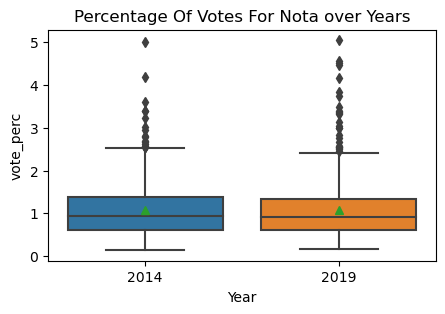

In [38]:
plt.figure(figsize = (5,3))
sns.boxplot(data = Q5, y = 'vote_perc', x = 'Year', showmeans = True)
plt.title('Percentage Of Votes For Nota over Years')
plt.show()

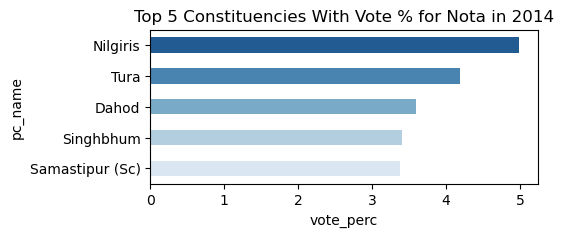

In [39]:
plt.figure(figsize = (5,2))
sns.barplot(data = Q5[Q5['Year'] == 2014].head(5),
           x = 'vote_perc', y = 'pc_name', width = .5, palette = 'Blues_r')
plt.title('Top 5 Constituencies With Vote % for Nota in 2014')
plt.show()

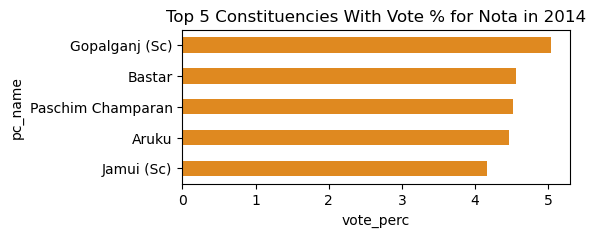

In [40]:
plt.figure(figsize = (5,2))
sns.barplot(data = Q5[Q5['Year'] == 2019].head(5),
           x = 'vote_perc', y = 'pc_name', width = .5, color = '#FF8C00')
plt.title('Top 5 Constituencies With Vote % for Nota in 2014')
plt.show()